In [1]:
import pandas as pd
import numpy as np
#Read the csv file
data= pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#We can check if any null values is present or not
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

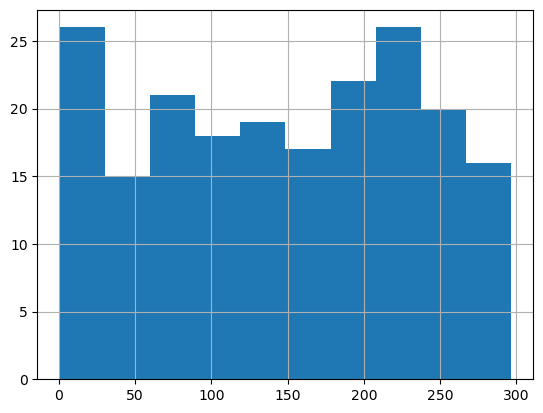

In [8]:
#Now We can use Histograph for Graphical Representation
data['TV'].hist()

<Axes: >

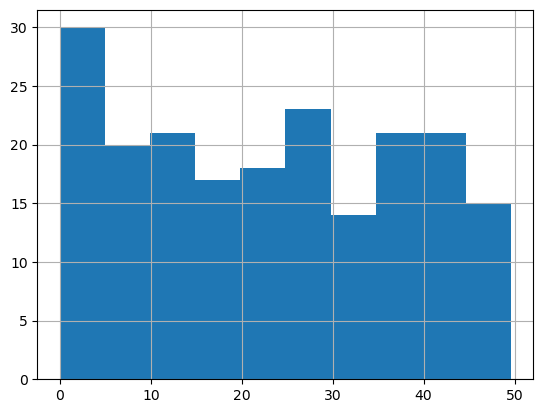

In [9]:
#Histograph of Radio data
data['Radio'].hist()

<Axes: >

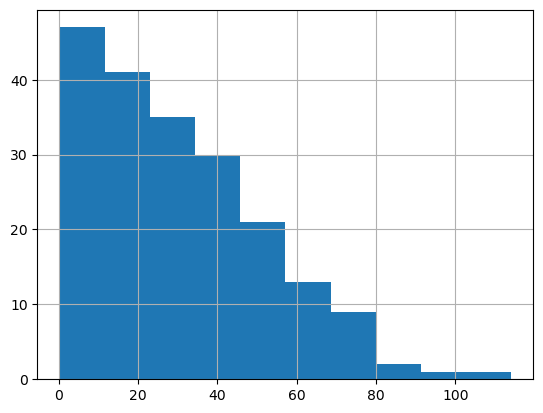

In [10]:
#Histograph of Newspaper data
data['Newspaper'].hist()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


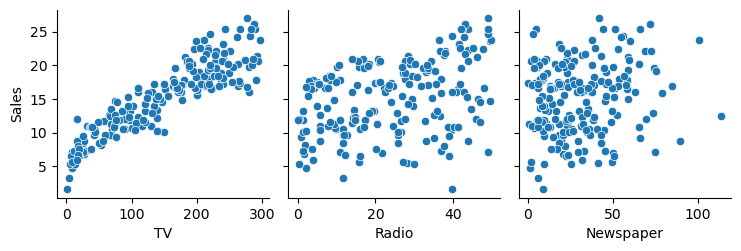

In [12]:
#Now let's see graphical represention using seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

<Axes: >

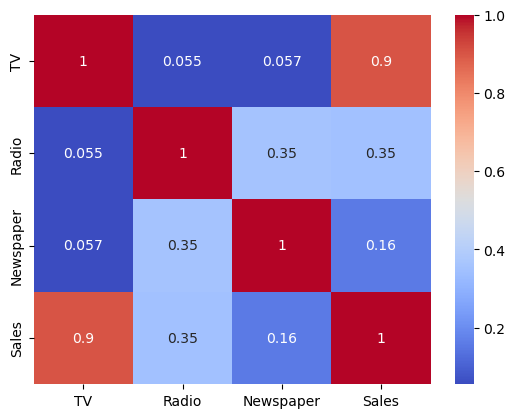

In [14]:
#Now we can use Heatmap Visual Representation for correlation matrix
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [17]:
#Now we can train The Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=data.drop(columns='Sales')
Y=data['Sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [18]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
Prediction=model.predict(X_test)
Prediction

array([17.94221632, 11.28731032, 19.36406753, 15.25309499,  8.85035488,
       11.08345095, 24.54827272, 10.72184726, 18.64190205, 17.03877174,
       14.71887065, 13.30204368, 19.10529921, 11.4654086 , 13.82417942,
       14.56139355, 16.86156735, 17.27369971, 17.78634747, 21.28201581,
       19.1397699 , 11.05346066,  9.93276334, 11.49854807,  8.5309559 ,
       13.26073545, 21.75566382, 16.96066432, 24.25791572, 11.92392893,
       16.40376866, 21.96064207,  9.51770237, 10.16209996, 10.08141197,
       10.45644324, 15.54919097,  9.92133897, 13.83425453, 12.54320065,
       14.5093965 , 12.61758414,  6.46804914, 20.25656292, 23.16303373,
       24.65508581, 15.20817964,  9.27513655, 18.72004324, 18.16217728,
       12.73063894, 16.65175796, 15.79776032,  8.36188762, 21.22771856,
        9.52094834, 23.88078008, 23.29062902, 19.6930198 , 16.76467522])

In [20]:
#intercept_ attribute provides the value of the intercept term learned by the model during training
model.intercept_

5.022730805826265

In [21]:
#coef_ attribute provides an array of coefficients, where each coefficient corresponds to a feature in the input data.
model.coef_

array([ 0.05223455,  0.10672463, -0.00120158])

In [24]:
Accuracy_Score=model.score(X_test,Y_test)*100
print(f"Accuracy of model: {Accuracy_Score}%")

Accuracy of model: 88.77675297095178%
